In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### reading data

In [3]:
train = pd.read_excel("C:/Users/0rame/Desktop/ML_tutorials/internship/flight_price_project/datas/Data_Train.xlsx")

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train.shape

(10683, 11)

there is 10683 columns and 11 rows

In [6]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
train.select_dtypes('object').columns.to_list()

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

this much columns contains text data,need to convert it

In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

showing 2 columns contains null values

['Route', 'Total_Stops']


<Axes: >

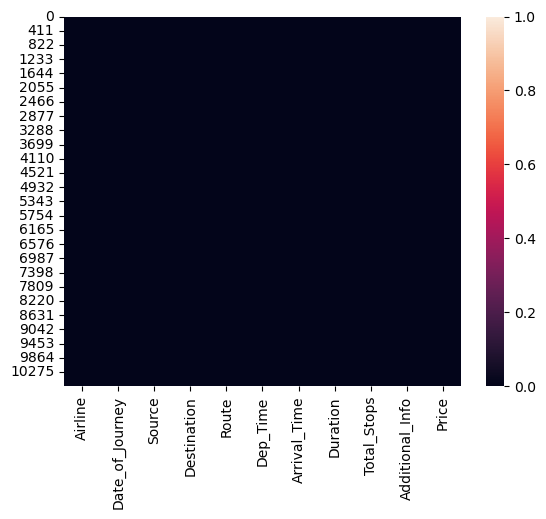

In [9]:
null_cols = [i for i in train.columns if train[i].isnull().sum() > 0 ]
print(null_cols)
sns.heatmap(train.isnull())

these are the 2 columns containing null_values

In [10]:
train.duplicated().sum()

220

contains 220 duplicate values

In [11]:
train[train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


duplicate values still showing different values across the columns,therefore we will keep it

### removing null values

In [12]:
train.dropna(inplace=True)

In [13]:
train.shape

(10682, 11)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


can see all columns contains 10682 values

### EDA

##### Analysing Target Varibale

In [15]:
train['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

can see target variable is contineous random variables,so we need to apply regression methods

### Feature columns:Univariate analysis

### Count Plots

In [16]:
airlines = train['Airline'].value_counts()

In [17]:
train['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

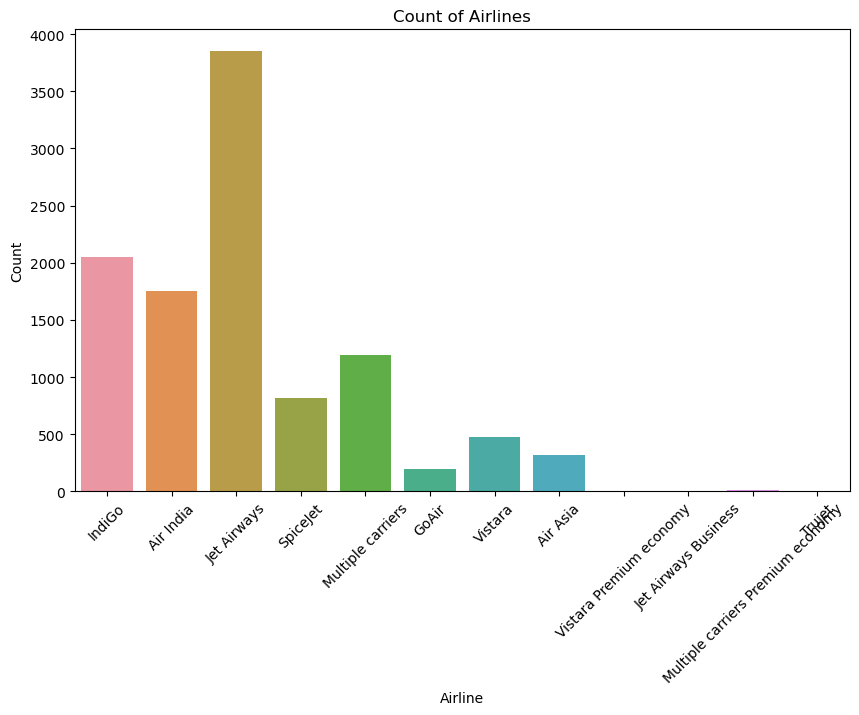

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Airline')
plt.title('Count of Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()

here you can see jet airways has most count trujet has the least

Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: count, dtype: int64


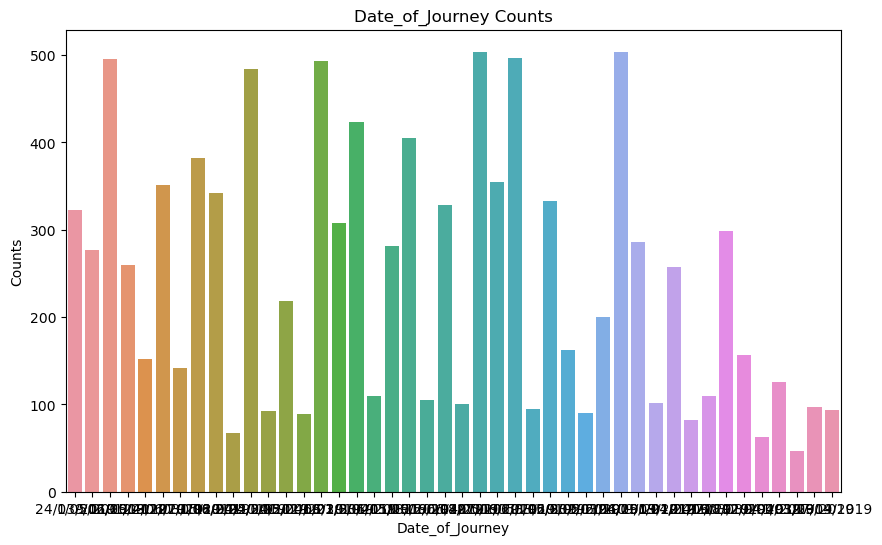

In [19]:
plt.figure(figsize=(10,6))
print(train['Date_of_Journey'].value_counts())
sns.countplot(data=train,x = 'Date_of_Journey')
plt.title("Date_of_Journey Counts")
plt.xlabel("Date_of_Journey")
plt.ylabel("Counts")
plt.show()

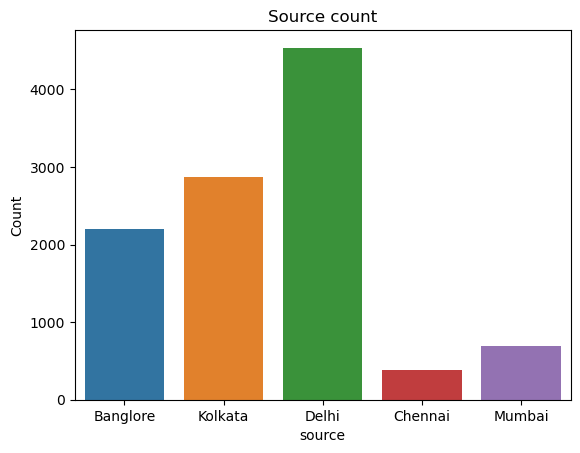

In [20]:
sns.countplot(data=train,x="Source")
plt.title("Source count")
plt.xlabel("source")
plt.ylabel("Count")
plt.show()

can see from delhi most number flies

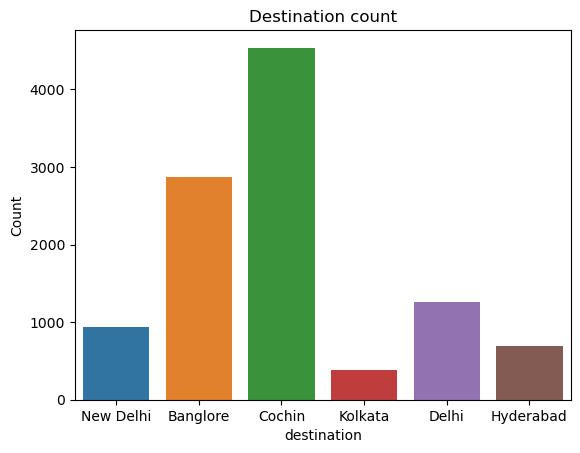

In [21]:
sns.countplot(data=train,x='Destination')
plt.title("Destination count")
plt.xlabel("destination")
plt.ylabel("Count")
plt.show()

cochin has highest arrival of flights

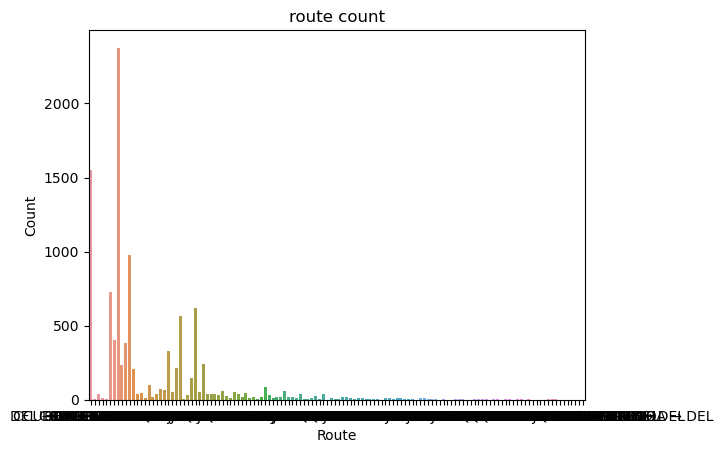

In [22]:
sns.countplot(data=train,x = 'Route')
plt.title("route count")
plt.xlabel("Route")
plt.ylabel("Count")
plt.show()

In [23]:
train['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

DEL → BOM → COK is the most traffic route

<function matplotlib.pyplot.show(close=None, block=None)>

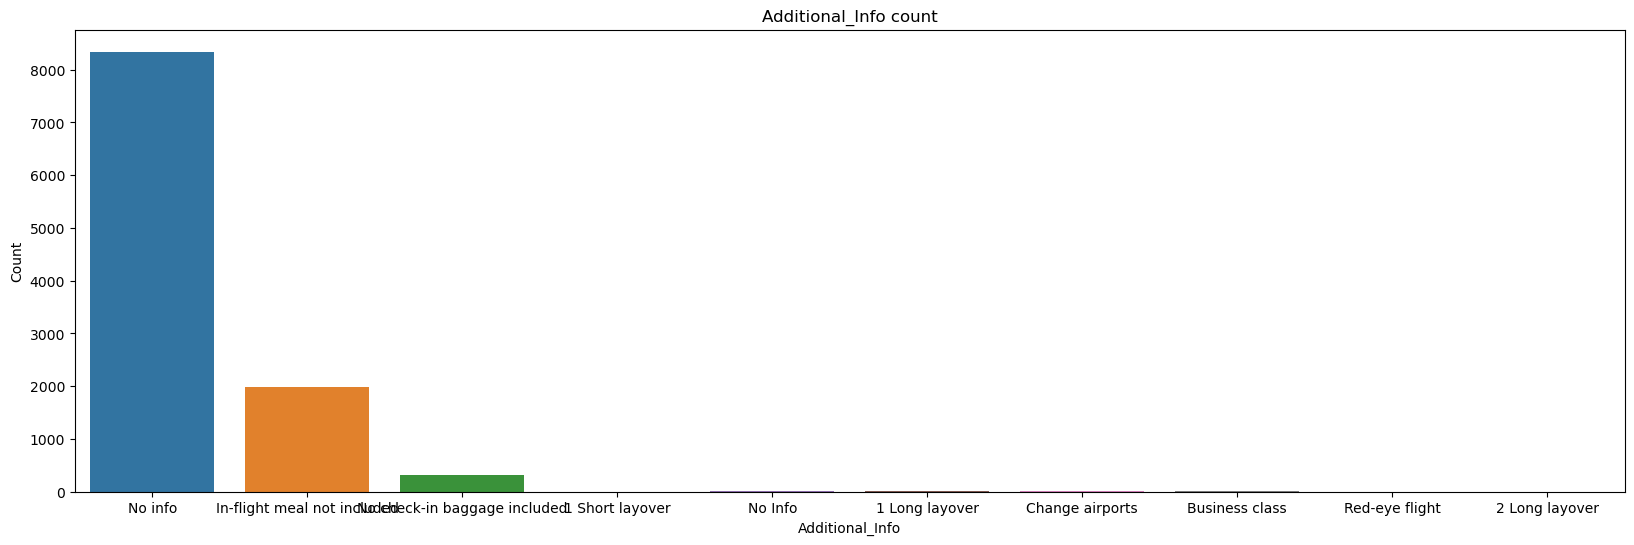

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(data=train,x='Additional_Info')
plt.title("Additional_Info count")
plt.xlabel("Additional_Info")
plt.ylabel("Count")
plt.show

In [25]:
train['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

### Bivariate Analysis

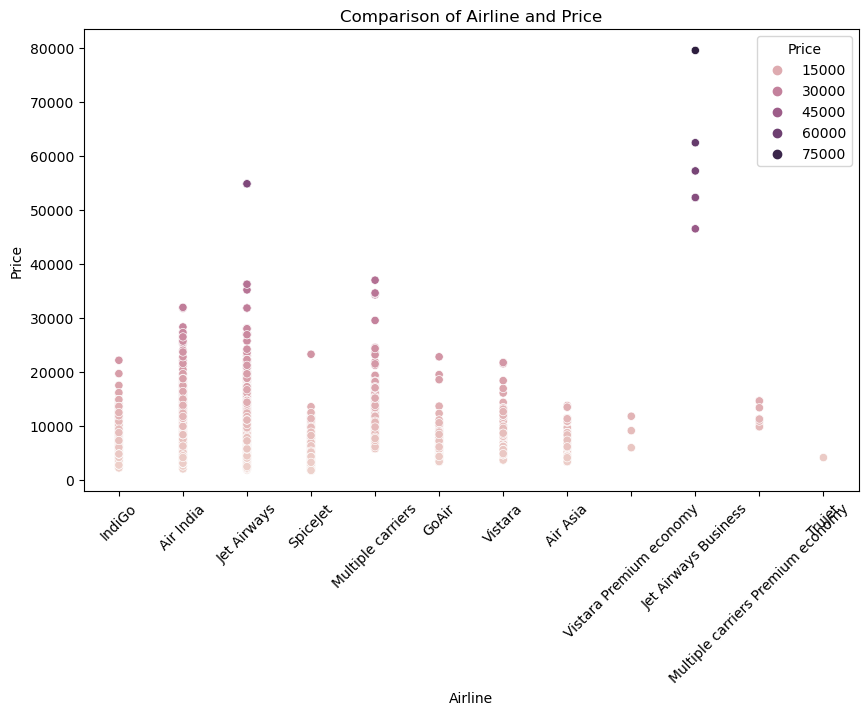

In [26]:
plt.figure(figsize=[10,6])
plt.title('Comparison of Airline and Price')
sns.scatterplot(data=train, x='Airline', y='Price', hue='Price')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

can see airlines companies are surely depending the price of flights

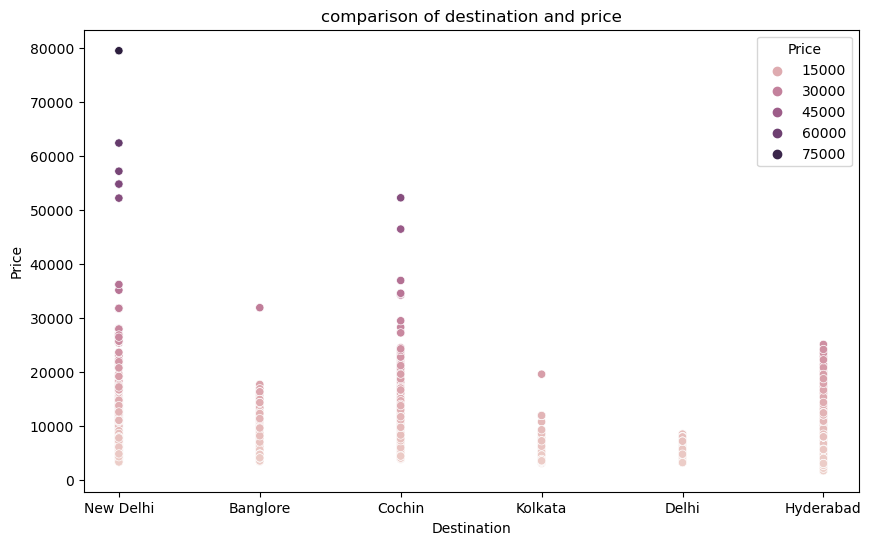

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train,x="Destination",y="Price",hue="Price")
plt.title("comparison of destination and price")
plt.xlabel("Destination")
plt.ylabel("Price")
plt.show()

destination is depending on the price of flights

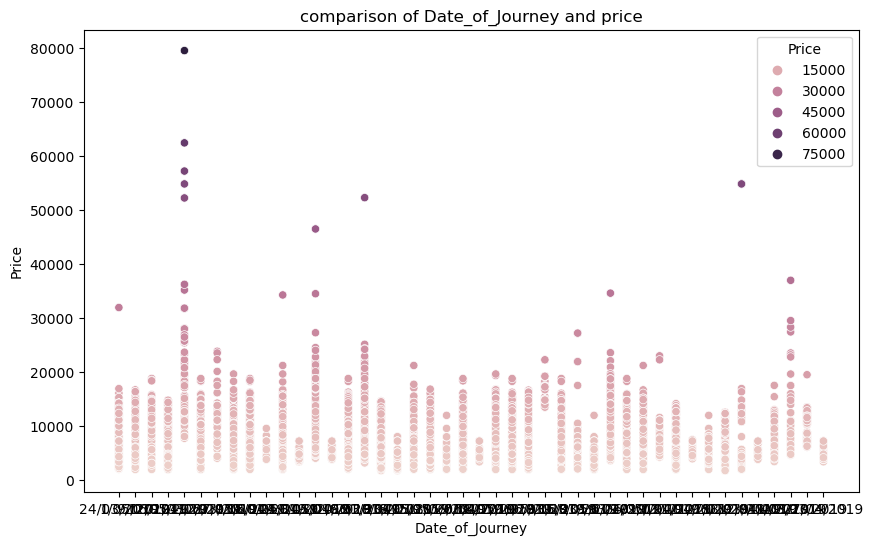

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train,x="Date_of_Journey",y="Price",hue="Price")
plt.title("comparison of Date_of_Journey and price")
plt.xlabel("Date_of_Journey")
plt.ylabel("Price")
plt.show()

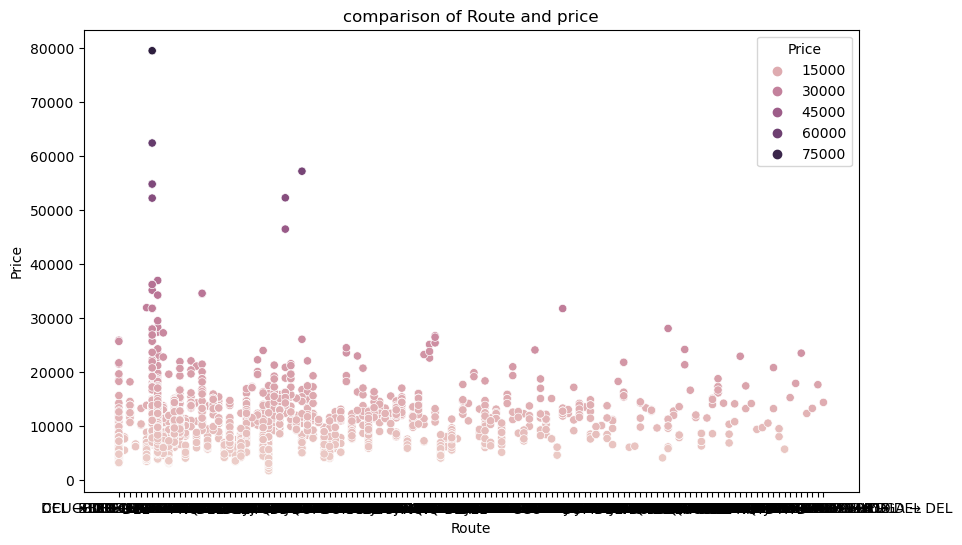

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train,x="Route",y="Price",hue="Price")
plt.title("comparison of Route and price")
plt.xlabel("Route")
plt.ylabel("Price")
plt.show()

route is not at all depending the price

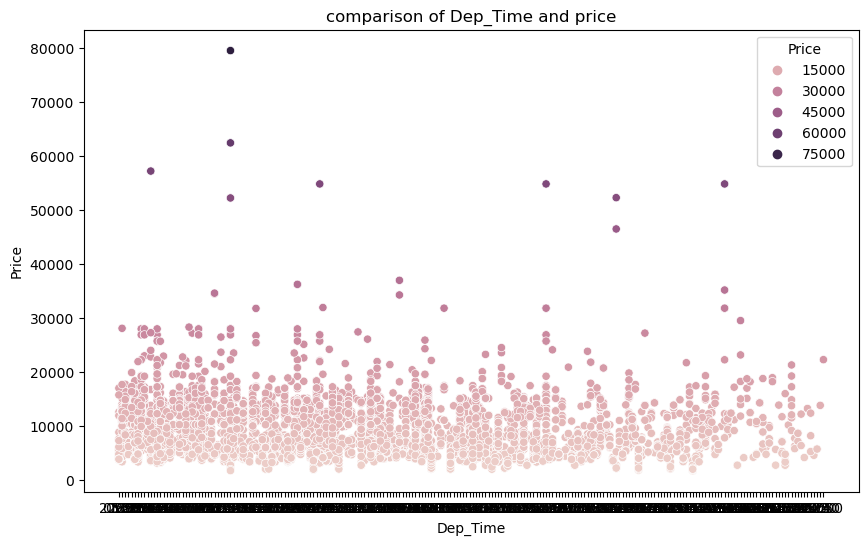

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train,x="Dep_Time",y="Price",hue="Price")
plt.title("comparison of Dep_Time and price")
plt.xlabel("Dep_Time")
plt.ylabel("Price")
plt.show()

dep_time not depending the price

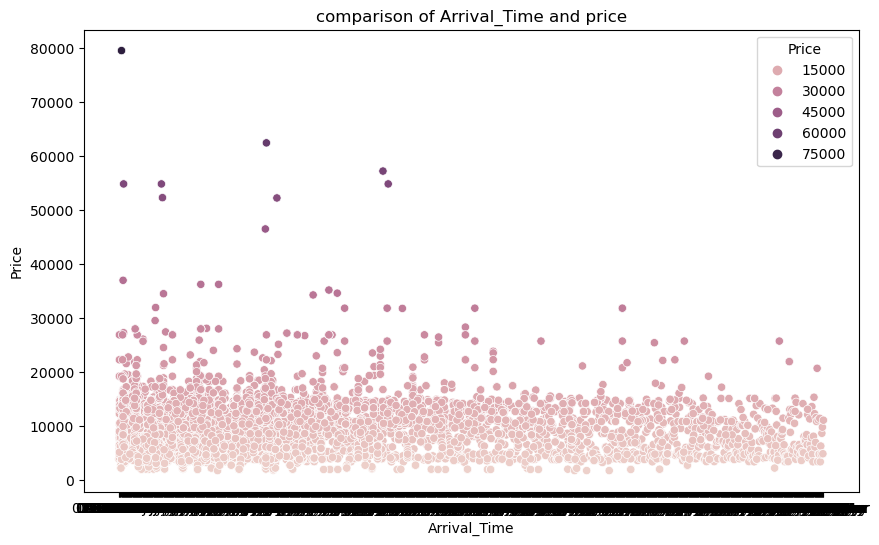

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train,x="Arrival_Time",y="Price",hue="Price")
plt.title("comparison of Arrival_Time and price")
plt.xlabel("Arrival_Time")
plt.ylabel("Price")
plt.show()

arrival_time also not at all depending the price of flight

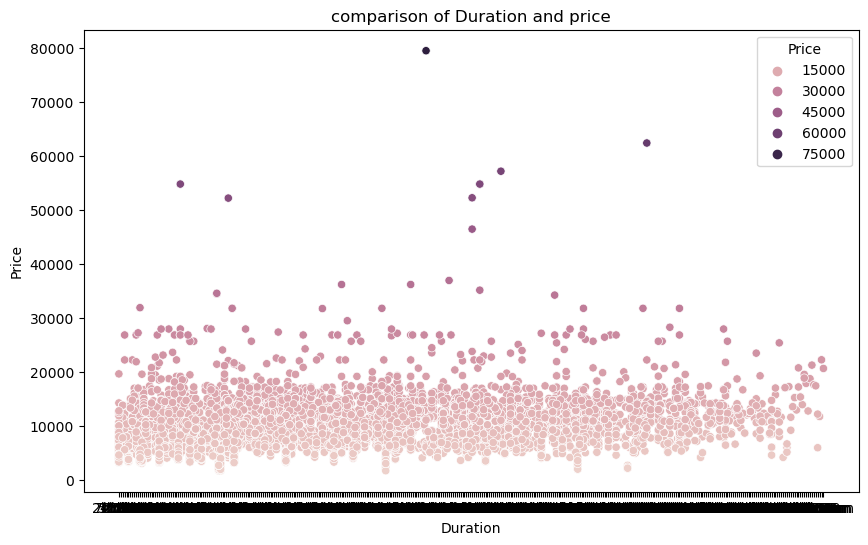

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train,x="Duration",y="Price",hue="Price")
plt.title("comparison of Duration and price")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

duration is not at all depending the price 

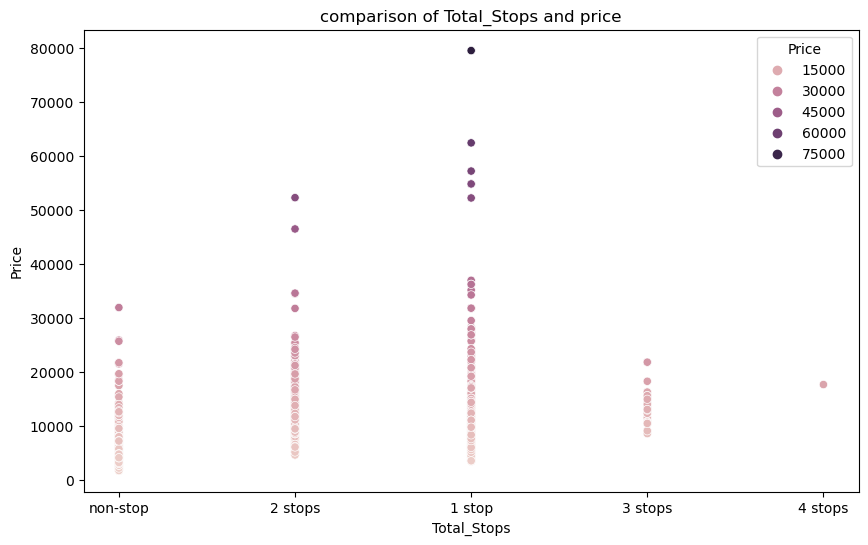

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train,x="Total_Stops",y="Price",hue="Price")
plt.title("comparison of Total_Stops and price")
plt.xlabel("Total_Stops")
plt.ylabel("Price")
plt.show()

Total_Stops surely depending the price of flights

### OUTLIERS DETECTION

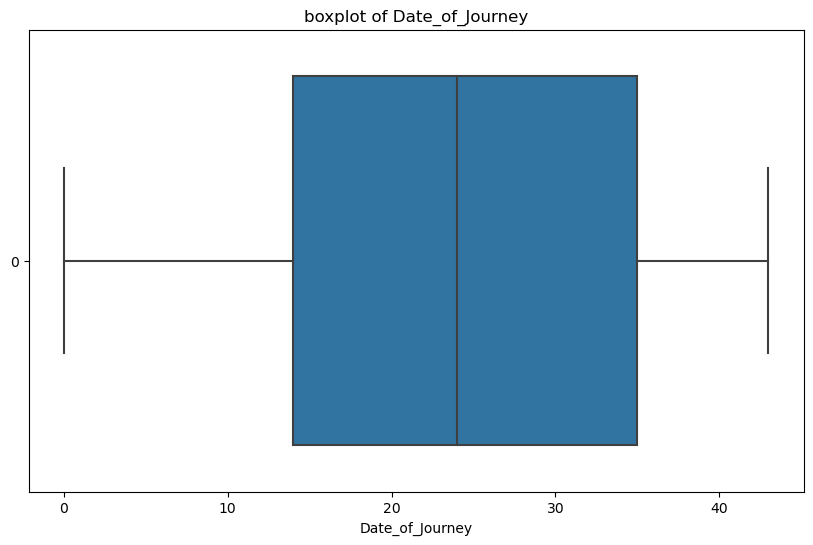

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train['Date_of_Journey'],orient='h')
plt.title("boxplot of Date_of_Journey")
plt.xlabel("Date_of_Journey")
plt.show()

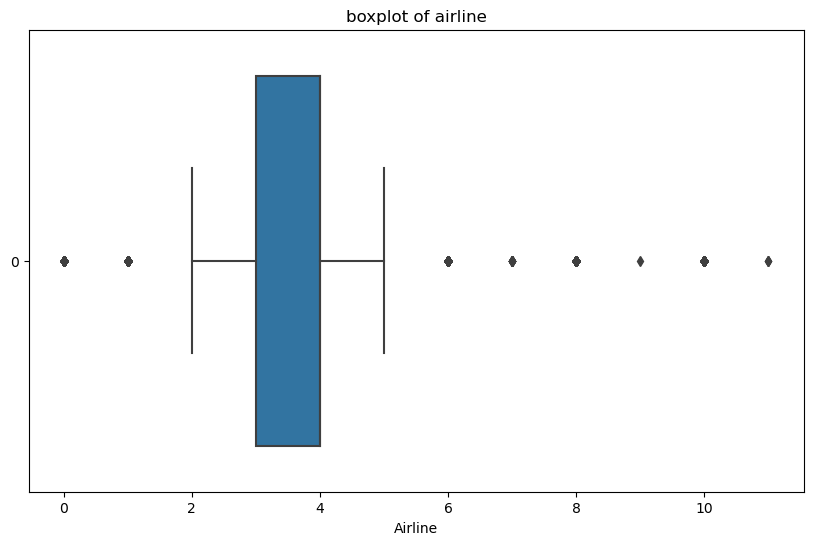

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train['Airline'],orient='h')
plt.title("boxplot of airline")
plt.xlabel("Airline")
plt.show()

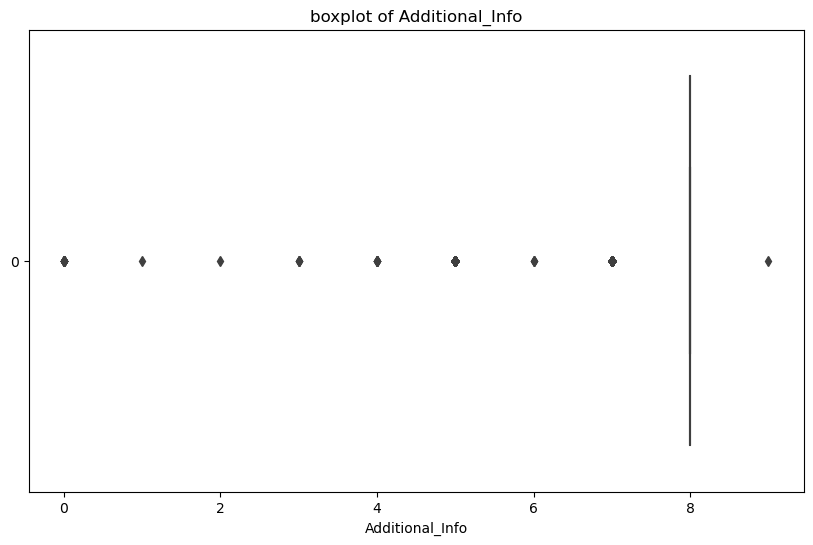

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train['Additional_Info'],orient='h')
plt.title("boxplot of Additional_Info")
plt.xlabel("Additional_Info")
plt.show()

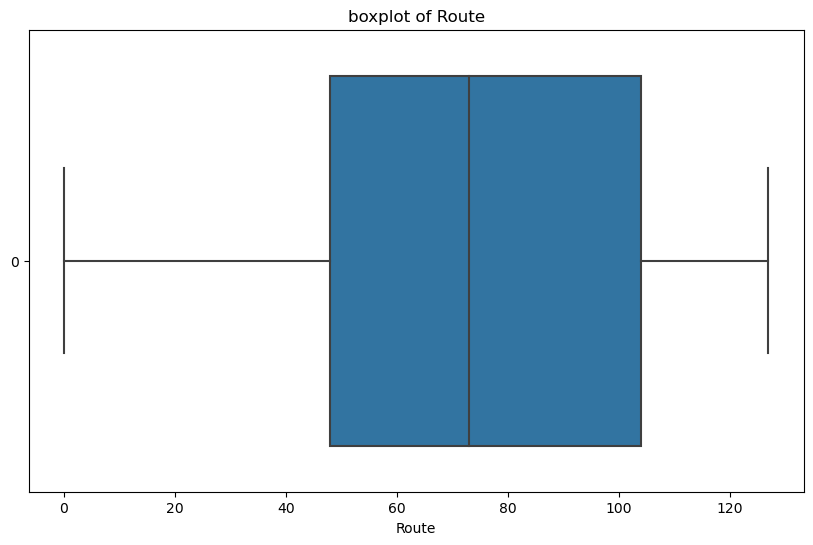

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train['Route'],orient='h')
plt.title("boxplot of Route")
plt.xlabel("Route")
plt.show()

no outliers present

In [44]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302


In [45]:
train['Total_Stops'].mode()[0]

0.0

### ENCODING

In [35]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [36]:
train.select_dtypes('object').columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [37]:
for i in train.select_dtypes('object'):
    train[i] = encoder.fit_transform(train[i].values.reshape(-1,1))

In [38]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302


In [39]:
train.dtypes

Airline            float64
Date_of_Journey    float64
Source             float64
Destination        float64
Route              float64
Dep_Time           float64
Arrival_Time       float64
Duration           float64
Total_Stops        float64
Additional_Info    float64
Price                int64
dtype: object

now can see no text data columns

### Removing Outliers

In [46]:
train.shape

(10682, 11)

In [47]:
from scipy.stats import zscore

In [48]:
z=np.abs(zscore(train))

In [49]:
train = train[(z<3).all(axis=1)]

In [50]:
train.shape

(10577, 11)

Z-score Standardization = Involves subtracting the mean of the dataset from each data point 
and then dividing by the standard deviation.

In [51]:
# train.skew()

### CORRELATION AND HEATMAP

In [52]:
cor = train.corr()

In [53]:
cor

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.020230,-0.015334,0.022059,0.022966,-0.040582,-0.014182,0.027133,0.036283,-0.067733,-0.044535
Date_of_Journey,0.020230,1.000000,0.147610,-0.248444,0.256375,-0.010257,-0.011386,-0.002251,-0.055443,-0.012156,0.025642
Source,-0.015334,0.147610,1.000000,-0.582837,0.390602,0.055611,0.020406,-0.195907,-0.237867,-0.041733,0.077215
Destination,0.022059,-0.248444,-0.582837,1.000000,-0.442636,-0.064592,-0.037922,0.023395,0.360340,0.054750,-0.175534
Route,0.022966,0.256375,0.390602,-0.442636,1.000000,-0.084290,0.011584,-0.063814,-0.454731,0.018228,0.255378
Dep_Time,-0.040582,-0.010257,0.055611,-0.064592,-0.084290,1.000000,-0.020277,0.041005,0.044246,-0.056142,0.001756
Arrival_Time,-0.014182,-0.011386,0.020406,-0.037922,0.011584,-0.020277,1.000000,0.028571,-0.099283,0.019897,0.040803
Duration,0.027133,-0.002251,-0.195907,0.023395,-0.063814,0.041005,0.028571,1.000000,0.176168,0.076945,-0.170010
Total_Stops,0.036283,-0.055443,-0.237867,0.360340,-0.454731,0.044246,-0.099283,0.176168,1.000000,0.162907,-0.621744
Additional_Info,-0.067733,-0.012156,-0.041733,0.054750,0.018228,-0.056142,0.019897,0.076945,0.162907,1.000000,-0.038248


In [91]:
# Get upper triangle of correlation matrix
upper_triangle = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

# Find features with correlation greater than 98%
highly_correlated = upper_triangle.abs().stack().sort_values(ascending=False)
highly_correlated = highly_correlated[highly_correlated > 0.80]

# Print highly correlated feature pairs
print(highly_correlated)

Series([], dtype: float64)


there is no 80% corelated features,therefore keep all the features as it is.features with high corleated means they give same impact

ABOVE TABLE GIVES THE DETAILS OF CORRELATION AMONG COLUMNS, PLOT WILL CONVEY THIS MORE

<Axes: >

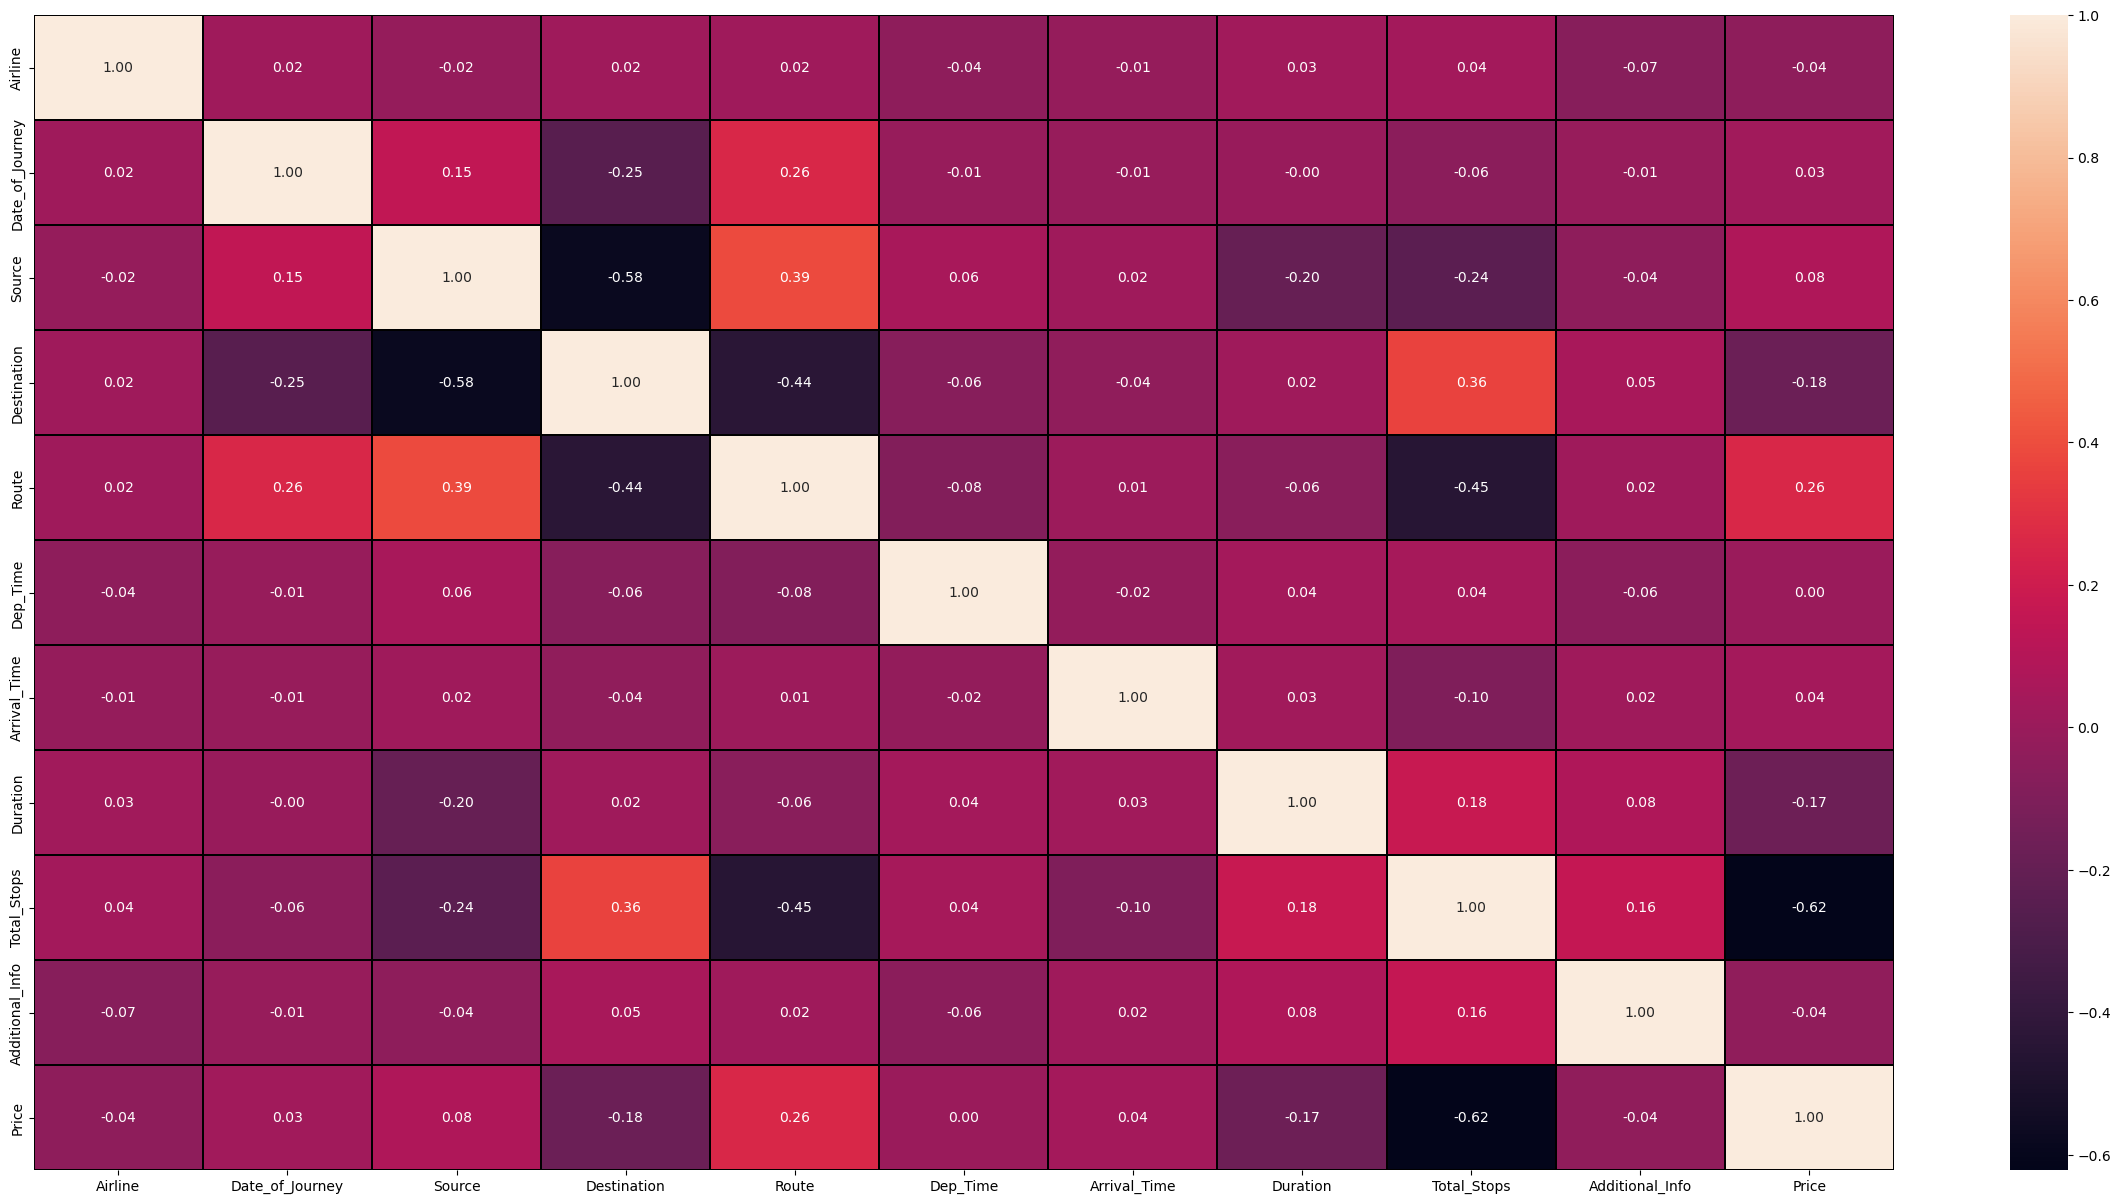

In [54]:
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

to know the dependency to target we have to depend another plot

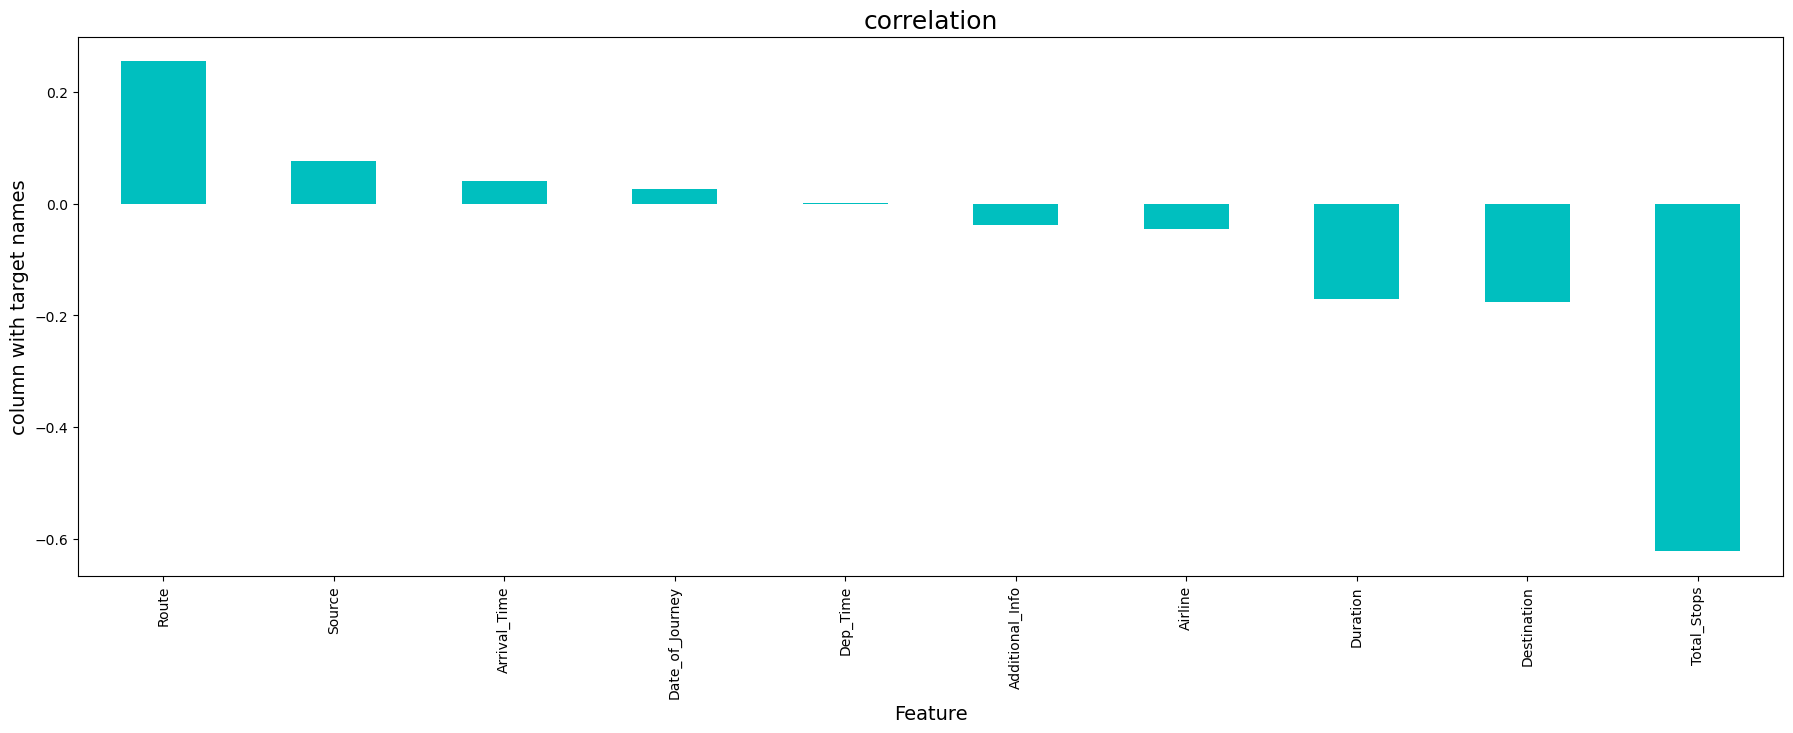

In [55]:
plt.figure(figsize=(22,7))
cor['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

here Dep_Time can be droped,bcs its dependency is nearly 0

In [56]:
train.drop('Dep_Time',inplace=True,axis=1)

### SKEWNESS

In [57]:
train.skew()

Airline            0.731671
Date_of_Journey   -0.061745
Source            -0.439175
Destination        1.269331
Route             -0.511212
Arrival_Time      -0.608421
Duration          -0.216167
Total_Stops        0.618057
Additional_Info   -1.533439
Price              0.410987
dtype: float64

SOME CCOLUMNS HAVE SKEWNESS PRESENCE ,HISTOGRAM CLEARLEY CONVEYS THIS

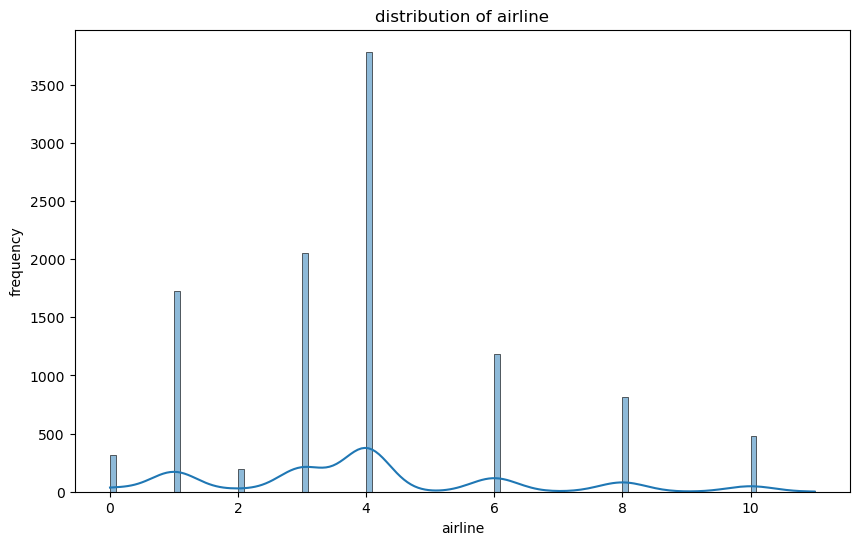

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(data=train['Airline'],kde=True)
plt.title("distribution of airline")
plt.xlabel("airline")
plt.ylabel("frequency")
plt.show()

C:\Users\0rame\AppData\Local\Temp\ipykernel_3128\1666750448.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Airline'],fit=norm)


<Axes: xlabel='Airline', ylabel='Density'>

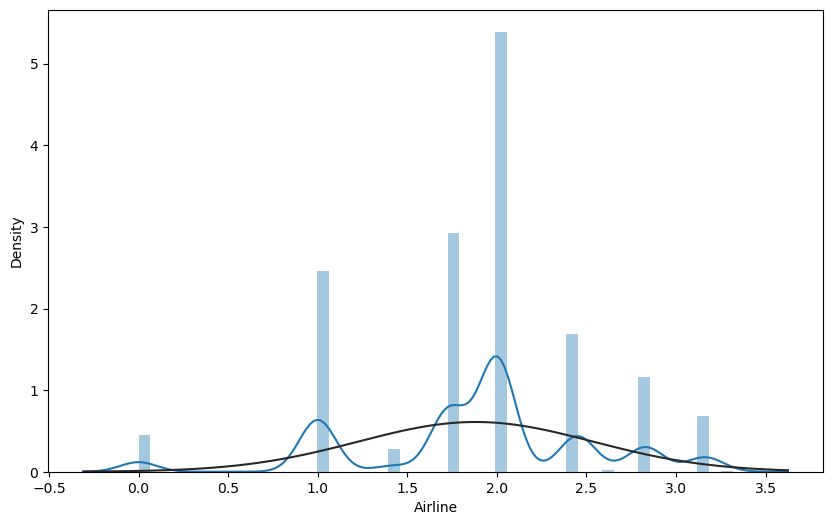

In [85]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.distplot(train['Airline'],fit=norm)

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=train['Arrival_Time'],kde=True)
plt.title("distribution of Arrival_Time")
plt.xlabel("Arrival_Time")
plt.ylabel("frequency")
plt.show()

C:\Users\0rame\AppData\Local\Temp\ipykernel_3128\2692335941.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Arrival_Time'],fit=norm)


<Axes: xlabel='Arrival_Time', ylabel='Density'>

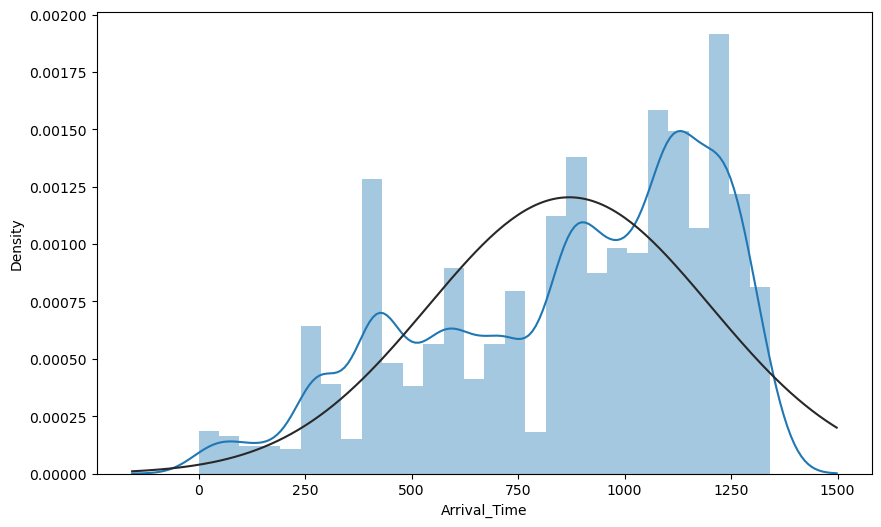

In [81]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.distplot(train['Arrival_Time'],fit=norm)

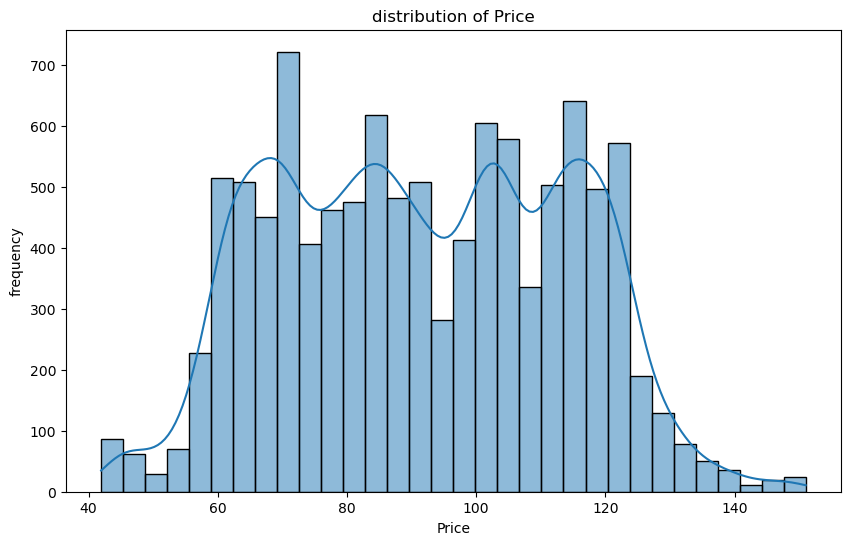

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(data=train['Price'],kde=True)
plt.title("distribution of Price")
plt.xlabel("Price")
plt.ylabel("frequency")
plt.show()

C:\Users\0rame\AppData\Local\Temp\ipykernel_3128\3494628954.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Price'],fit=norm)


<Axes: xlabel='Price', ylabel='Density'>

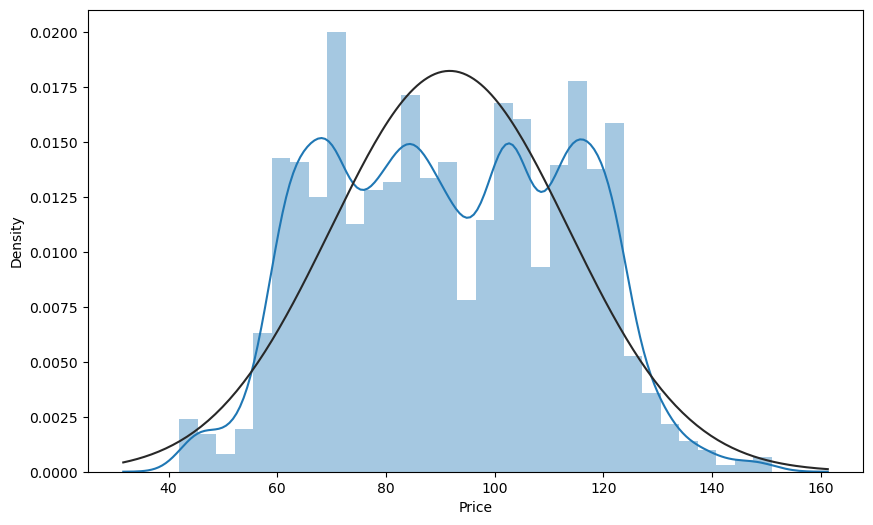

In [83]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.distplot(train['Price'],fit=norm)
# plt.title("distribution of Price")
# plt.xlabel("Price")
# plt.ylabel("frequency")
# plt.show()

C:\Users\0rame\AppData\Local\Temp\ipykernel_3128\2869140143.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Additional_Info'],fit=norm)


<Axes: xlabel='Additional_Info', ylabel='Density'>

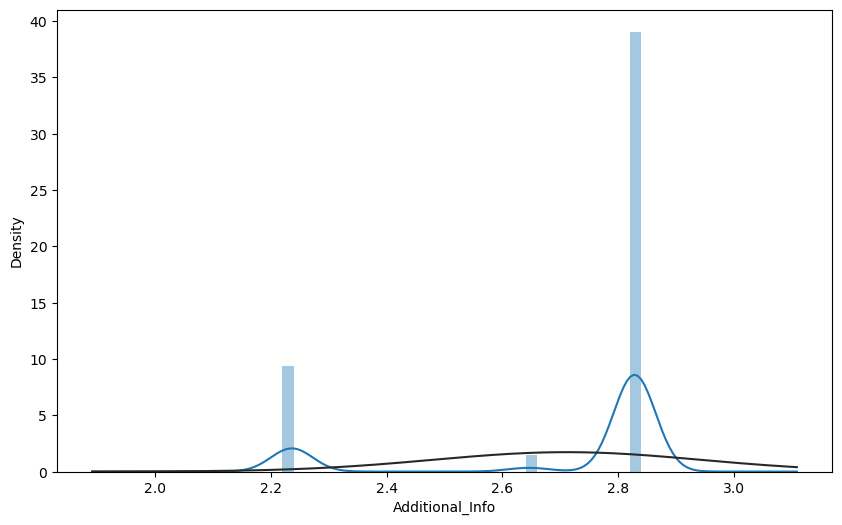

In [84]:
plt.figure(figsize=(10,6))
sns.distplot(train['Additional_Info'],fit=norm)

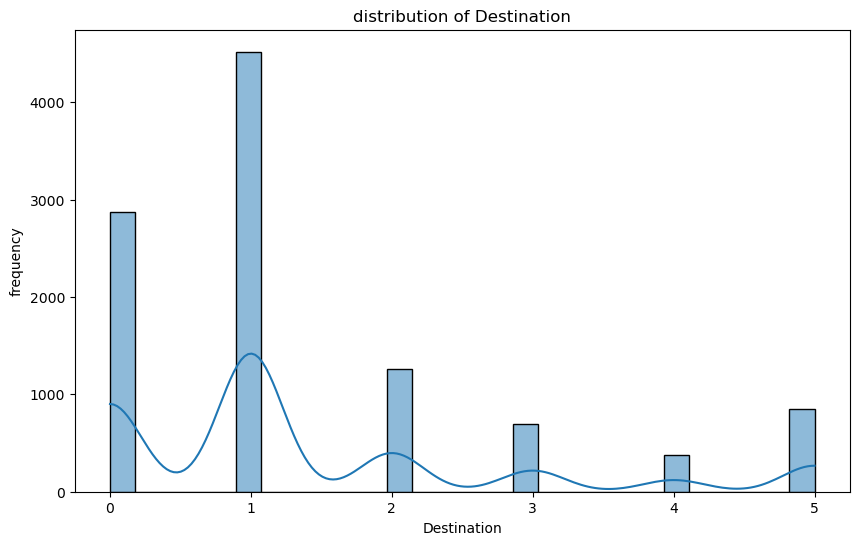

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(data=train['Destination'],kde=True)
plt.title("distribution of Destination")
plt.xlabel("Destination")
plt.ylabel("frequency")
plt.show()

C:\Users\0rame\AppData\Local\Temp\ipykernel_3128\4015406052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Destination'],fit=norm)


<Axes: xlabel='Destination', ylabel='Density'>

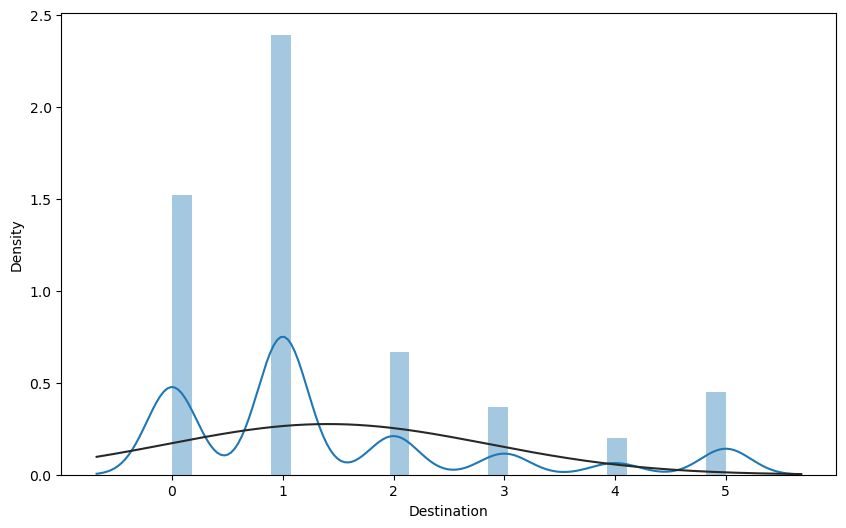

In [65]:
plt.figure(figsize=(10,6))
sns.distplot(train['Destination'],fit=norm)

Airline: 0.731057 (moderate positive skewness)
Date_of_Journey: -0.070718 (close to 0, so approximately symmetric)
Source: -0.424023 (close to 0, so approximately symmetric)
Destination: 1.244046 (moderate positive skewness)
Route: -0.501911 (close to 0, so approximately symmetric)
Arrival_Time: -0.606676 (close to 0, so approximately symmetric)
Duration: -0.213498 (close to 0, so approximately symmetric)
Total_Stops: 0.631532 (moderate positive skewness)
Additional_Info: -1.779689 (high negative skewness)
Price: 1.812405 (moderate positive skewness)

airline,price,destination,total_stops,Additional_Info contains skewness needs to be removed

### REMOVING SKEWNESS BY SQRT

In [66]:
from scipy import sqrt

In [67]:
train['Airline'] = np.sqrt(train['Airline'])
train['Price'] = np.sqrt(train['Price'])
train['Destination'] = np.sqrt(train['Destination'])
train['Total_Stops'] = np.sqrt(train['Total_Stops'])
train['Additional_Info'] = np.sqrt(train['Additional_Info'])

In [68]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,1.732051,24.0,0.0,2.236068,18.0,233.0,240.0,2.0,2.828427,62.425956
1,1.000000,6.0,3.0,0.000000,84.0,906.0,336.0,1.0,2.828427,87.532851
2,2.000000,43.0,2.0,1.000000,118.0,413.0,106.0,1.0,2.828427,117.821899
3,1.732051,10.0,3.0,0.000000,91.0,1324.0,311.0,0.0,2.828427,78.854296
4,1.732051,0.0,0.0,2.236068,29.0,1237.0,303.0,0.0,2.828427,115.334297


In [69]:
train.skew()

Airline           -0.471799
Date_of_Journey   -0.061745
Source            -0.439175
Destination        0.020064
Route             -0.511212
Arrival_Time      -0.608421
Duration          -0.216167
Total_Stops        0.385477
Additional_Info   -1.542589
Price              0.032843
dtype: float64

In [70]:
x = train.drop('Price',axis=1)
y = train['Price']

assigned independent variables into 'x' and target variable into 'y'

In [71]:
x.shape

(10577, 9)

In [72]:
y.shape

(10577,)

In [73]:
x2 = x.copy()

In [74]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
X_power=pt.fit_transform(x2)
x=pd.DataFrame(X_power,columns=x.columns)

. The Yeo-Johnson transformation is a method for transforming non-normal or skewed data to be closer to a normal distribution. It handles both positive and negative values and works with data that may contain zeros or negative values, unlike the Box-Cox transformation, which only works with strictly positive data.

In [75]:
x2.skew()

Airline           -0.471799
Date_of_Journey   -0.061745
Source            -0.439175
Destination        0.020064
Route             -0.511212
Arrival_Time      -0.608421
Duration          -0.216167
Total_Stops        0.385477
Additional_Info   -1.542589
dtype: float64

In [76]:
x = x2.copy()

In [77]:
x.skew()

Airline           -0.471799
Date_of_Journey   -0.061745
Source            -0.439175
Destination        0.020064
Route             -0.511212
Arrival_Time      -0.608421
Duration          -0.216167
Total_Stops        0.385477
Additional_Info   -1.542589
dtype: float64

still Additional_Info showing -ve skewness in high margin,so we will drop it

In [78]:
x.drop('Additional_Info',inplace=True,axis=1)

In [79]:
x.shape

(10577, 8)

### MULTICOLLINEARITY

VIF HELP TO FIND THE MULTICOLLINEARITY

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)
vif_calc()

   VIF Factor         Features
0    7.695483          Airline
1    4.971001  Date_of_Journey
2    5.776153           Source
3    4.017462      Destination
4    7.213232            Route
5    6.417160     Arrival_Time
6    4.080084         Duration
7    2.333694      Total_Stops


 VIF is a measure of how much the variance of the estimated regression coefficients are increased because of collinearity among the predictor variables.

NO VIF VALUES ARE IN HIGH RANGE

VIF values greater than 10 are often considered problematic and indicate high multicollinearity.
VIF values between 5 and 10 indicate moderate multicollinearity.
VIF values below 5 are generally considered acceptable.

### SCALING FEATURES

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x = scaler.fit_transform(x)

In [93]:
cor = x.corr()

In [94]:
# Get upper triangle of correlation matrix
upper_triangle = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

# Find features with correlation greater than 98%
highly_correlated = upper_triangle.abs().stack().sort_values(ascending=False)
highly_correlated = highly_correlated[highly_correlated > 0.80]

# Print highly correlated feature pairs
print(highly_correlated)

Series([], dtype: float64)


still there is no highly corelated features

### SPLITTING AND APPLYING ALGORITHMS

In [96]:
from sklearn.model_selection import train_test_split

In [98]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=45)

In [100]:
list = [xtrain,xtest,ytrain,ytest]

In [101]:
for i in list:
    print(i.shape)

(7403, 8)
(3174, 8)
(7403,)
(3174,)


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pickle
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=45)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

# Loop through each model
for name, model in models.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    
    with open(f"{name}.pkl", 'wb') as file:
        pickle.dump(model, file)
    
    # Make predictions
    ypred = model.predict(xtest)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    
    # Print results
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print("---------------")


Model: Linear Regression
Mean Squared Error: 306.71172371184235
R-squared Score: 0.3544008472023841
---------------
Model: Support Vector Regressor
Mean Squared Error: 426.9463335763576
R-squared Score: 0.10131837182100423
---------------
Model: Decision Tree Regressor
Mean Squared Error: 139.55638298251608
R-squared Score: 0.7062470207181935
---------------


For regression tasks, metrics such as Mean Squared Error (MSE) and R-squared (R2) are more appropriate for evaluating the performance of the models

Mean Squared Error (MSE):
MSE quantifies the average squared difference between predicted values and actual values. Lower values indicate better performance.
In your results, the Decision Tree Regressor has the lowest MSE (137.99), indicating that, on average, its predictions have the smallest squared difference from the actual values compared to the other models.
R-squared (R2) Score:
R2 score measures the proportion of the variance in the target variable that is explained by the model. Higher values indicate better performance, with 1 being the best.
The Decision Tree Regressor has the highest R2 score (0.71), suggesting that it explains approximately 71% of the variance in the target variable, which is more than the other models.
Based on these metrics:

The Decision Tree Regressor exhibits the lowest MSE, implying that, on average, its predictions are closest to the actual values.
The Decision Tree Regressor also boasts the highest R2 score, indicating that it explains a larger proportion of the variance in the target variable compared to the other models.

R-squared Score ranges 0 to 1 .Closing to 1 means better model

#### Decision Tree Regressor is the best model among them